# MVP: Machine Learning & Analytics
### Problema de Classificação com Machine Learning
**Autor:**   Ana Luiza Peixoto

**Data:** 27/08/2025

**Matrícula:** 4052025001726

**Dataset:** Global Coffee Dataset (https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset.)

`≈15⏱️ min`

---


# 1. Escopo, Objetivo e Definição do Problema
## Contexto do Problema
A qualidade do sono é um indicador fundamental da saúde humana, afetando diretamente o bem-estar físico e mental das pessoas. Com o crescimento do uso de dispositivos wearables que monitoram padrões de sono, existe uma oportunidade significativa para aplicar técnicas de machine learning na análise desses dados para compreender melhor os fatores que influenciam a qualidade do sono.

Um dos aspectos mais relevantes neste contexto é o consumo de cafeína, especialmente através do café, uma das bebidas mais consumidas mundialmente. Embora seja amplamente reconhecido que a cafeína pode afetar o sono, a relação entre diferentes níveis de consumo, características individuais e qualidade do sono não é simples ou linear. Fatores como idade, índice de massa corporal, níveis de estresse, atividade física e condições de saúde interagem de forma complexa, criando padrões que podem não ser imediatamente óbvios para análise manual.

##Definição do Problema
Este projeto aborda um problema de classificação em machine learning: dado um conjunto de variáveis relacionadas ao estilo de vida, saúde e consumo de cafeína de uma pessoa, é possível prever sua qualidade de sono? A capacidade de fazer essa predição tem aplicações práticas em áreas como medicina preventiva, wellness corporativo e desenvolvimento de aplicativos de saúde.

O problema é formulado como uma tarefa de classificação supervisionada multiclasse, onde o objetivo é classificar a qualidade do sono em quatro categorias: Poor (Ruim), Fair (Regular), Good (Bom) e Excellent (Excelente). As variáveis preditoras incluem dados demográficos, métricas de saúde física, padrões de consumo de cafeína, níveis de atividade física e indicadores de estresse.

O valor prático dessa análise reside na possibilidade de identificar automaticamente quais fatores de estilo de vida têm maior impacto na qualidade do sono de um indivíduo. Isso pode orientar intervenções mais direcionadas e eficazes, seja em contextos clínicos, programas de bem-estar corporativo ou desenvolvimento de recomendações personalizadas em aplicações de saúde digital.

## Hipotese
Este trabalho é baseado na seguinte hipótese central:
> A partir de dados de saúde, estilo de vida e características demográficas, é possível prever com precisão satisfatória a qualidade do sono de uma pessoa

##Dataset

Para este estudo, utilizamos o Global Coffee Dataset disponível no Kaggle, que contém 10.000 registros simulados de indivíduos de 20 países diferentes. O dataset integra informações sobre consumo de café, padrões de sono, indicadores de saúde e variáveis de estilo de vida. Embora seja um dataset sintético, foi construído para refletir correlações conhecidas na literatura médica sobre os fatores que influenciam a qualidade do sono.

A escolha deste dataset se justifica pela dificuldade de encontrar dados reais que combinem a amplitude de variáveis necessárias para esta análise. O Global Coffee Dataset oferece a diversidade de variáveis e o tamanho amostral adequados para explorar técnicas de machine learning neste domínio. Sua usabilidade no Kaggle é 10.

É fundamental reconhecer as limitações inerentes ao uso de dados sintéticos. Os métodos de geração não são completamente documentados, o que levanta questões sobre a fidelidade das correlações simuladas em relação aos padrões reais observados clinicamente. Contudo, para fins de desenvolvimento metodológico e exploração de técnicas de machine learning, o dataset fornece uma base apropriada para investigação.                                                

---


#2. Reprodutibilidade e Ambiente
##Configuração do Ambiente

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##3. Carga dos Dados

In [20]:

dataset = pd.read_csv("https://raw.githubusercontent.com/analuizapx/mvp_ml/main/coffee_health.csv")
dataset.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


###Estrutura do Dataset

| Column                    | Descrição                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| ID  (DELETADO)                       | Identificador único do registro (1–10000)                                |
| Age                        | Idade do participante (18–80 anos)                                       |
| Gender                     | Masculino, Feminino, Outro                                               |
| Country                    | País de residência (20 países)                                           |
| Coffee_Intake              | Consumo diário de café em xícaras (0–10)                                 |
| Caffeine_mg                | Estimativa de consumo diário de cafeína em mg (1 xícara ≈ 95 mg)         |
| Sleep_Hours (DELETADO)               | Média de horas de sono por noite (3–10 horas)                            |
| Sleep_Quality (TARGET)             | Ruim, Regular, Boa, Excelente           |
| BMI                        | Índice de Massa Corporal (15–40)                                         |
| Heart_Rate                 | Frequência cardíaca em repouso (50–110 bpm)                              |
| Stress_Level               | Baixo, Médio, Alto         |
| Physical_Activity_Hours    | Atividade física semanal (0–15 horas)                                    |
| Health_Issues              | Nenhum, Leve, Moderado, Grave              |
| Occupation                 | Escritório, Saúde, Estudante, Serviços, Outro                            |
| Smoking                    | 0 = Não, 1 = Sim                                                         |
| Alcohol_Consumption        | 0 = Não, 1 = Sim         

---

#4. Definição do Target, Variáveis e Divisão dos Dados
## Pré-processamento de Variáveis Categóricas


Como explicado anteriormente, a variavél a ser usada como **target é Sleep_Quality**.

Para o tratamento das variáveis categóricas neste dataset, optamos pelo **Label Encoding** devido à natureza mista das variáveis e considerações práticas de implementação. Algumas variáveis como Sleep_Quality (Poor→0, Fair→1, Good→2, Excellent→3), Stress_Level (Low→0, Medium→1, High→2) e Health_Issues (None→0, Mild→1, Moderate→2, Severe→3) possuem ordem natural clara, tornando o Label Encoding a escolha ideal para preservar essas relações ordinais. Para variáveis nominais como Gender, Country e Occupation, embora One-Hot Encoding seria teoricamente mais apropriado, escolhemos Label Encoding por simplicidade e para evitar o aumento da dimensionalidade. Esta abordagem permite que os algoritmos processem todas as variáveis categóricas de forma consistente, embora reconheçamos que isso pode introduzir relações ordinais artificiais em variáveis nominais como Country (20 países codificados de 0-19) e Gender.

A variável **Sleep_Hours foi estrategicamente removida** para evitar vazamento de dados (data leakage), pois a quantidade de horas dormidas está diretamente relacionada à qualidade do sono, podendo artificialmente inflar a performance do modelo. Nossa análise foca em fatores de estilo de vida que podem ser modificados independentemente da quantidade final de sono obtida. Houve também a **remoção da variável ID** por não ter valor preditivo


In [21]:
le = LabelEncoder()
categorical_columns = ['Gender','Country','Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in categorical_columns:
    if col in dataset.columns:
        dataset[col] = le.fit_transform(dataset[col])

# Remover colunas desnecessárias (ID e Sleep_Hours)
dataset = dataset.drop(['ID', 'Sleep_Hours'], axis=1)


##Divisão dos Dados

In [22]:
# Separação em bases de treino e target
X = dataset.drop('Sleep_Quality', axis=1).values # todas as colunas exceto Sleep_Quality
y = dataset['Sleep_Quality'].values # coluna Sleep_Quality

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

**Justificativa dos Parâmetros:**

* **test_size=0.20:** Reserva suficiente para avaliação final sem comprometer o treino
*  **stratify=y:** Mantém a proporção das classes nos conjuntos de treino e teste
*  **random_state=7:** Garantia de reprodutibilidade
*  **10-fold CV:** Padrão para validação robusta com dataset de tamanho moderado

---

#5. Baseline e Modelos Candidatos
##Estratégia de Modelagem
Como não sabemos antecipadamente quais algoritmos performarão bem neste conjunto de dados, utilizaremos validação cruzada para treinar e avaliar múltiplos modelos usando a métrica acurácia. Começamos com configurações padrão de hiperparâmetros da scikit-learn. Serão usados os modelos vistos no material didático do curso.

In [23]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
#BaggingClassifier in your scikit-learn version uses estimator instead of base_estimator
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

#6. Treino e Avaliação dos Modelos
##Avaliação com Configurações Padrão

KNN: 0.495000 (0.014164)
CART: 0.781250 (0.013276)
NB: 0.864750 (0.007391)
SVM: 0.563625 (0.011503)
Bagging: 0.861125 (0.007674)
RF: 0.863750 (0.007786)
ET: 0.863125 (0.007315)
Ada: 0.768625 (0.011018)
GB: 0.863750 (0.008043)
Voting: 0.817000 (0.010250)


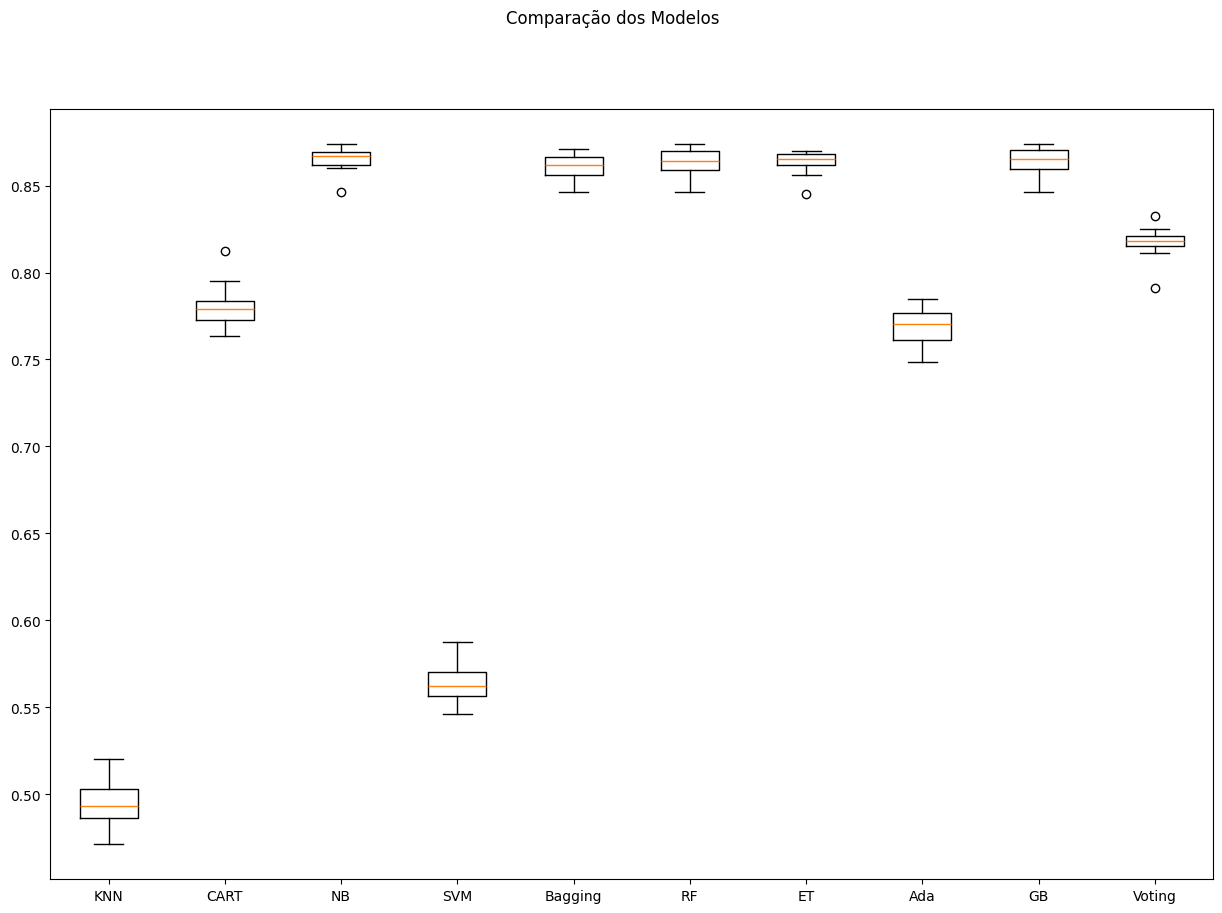

In [24]:
# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Análise dos Resultados Iniciais:**
A análise inicial revela que o Naive Bayes obteve a melhor performance (~86.48%), seguido de perto pelos métodos ensemble. Esta performance superior do Naive Bayes pode ser atribuída à natureza das variáveis do dataset e à assumpção de independência condicional que, apesar de simplista, parece apropriada para este domínio específico.



---



## 7. Avaliação com Pipeline, Normalização e Padronização
`≈⏱️10 min`

Em seguida, vamos repetir esse processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original:

KNN-orig: 0.495 (0.014)
CART-orig: 0.781 (0.013)
NB-orig: 0.865 (0.007)
SVM-orig: 0.564 (0.012)
Bag-orig: 0.861 (0.008)
RF-orig: 0.864 (0.008)
ET-orig: 0.863 (0.007)
Ada-orig: 0.769 (0.011)
GB-orig: 0.864 (0.008)
Vot-orig: 0.817 (0.010)
KNN-padr: 0.837 (0.010)
CART-padr: 0.783 (0.010)
NB-padr: 0.865 (0.007)
SVM-padr: 0.865 (0.007)
Bag-padr: 0.861 (0.007)
RF-padr: 0.863 (0.008)
ET-padr: 0.863 (0.008)
Ada-padr: 0.769 (0.011)
GB-padr: 0.864 (0.008)
Vot-padr: 0.865 (0.007)
KNN-norm: 0.843 (0.008)
CART-norm: 0.782 (0.012)
NB-norm: 0.865 (0.007)
SVM-norm: 0.865 (0.007)
Bag-norm: 0.860 (0.009)
RF-norm: 0.863 (0.007)
ET-norm: 0.862 (0.007)
Ada-norm: 0.769 (0.011)
GB-norm: 0.864 (0.008)
Vot-norm: 0.865 (0.007)


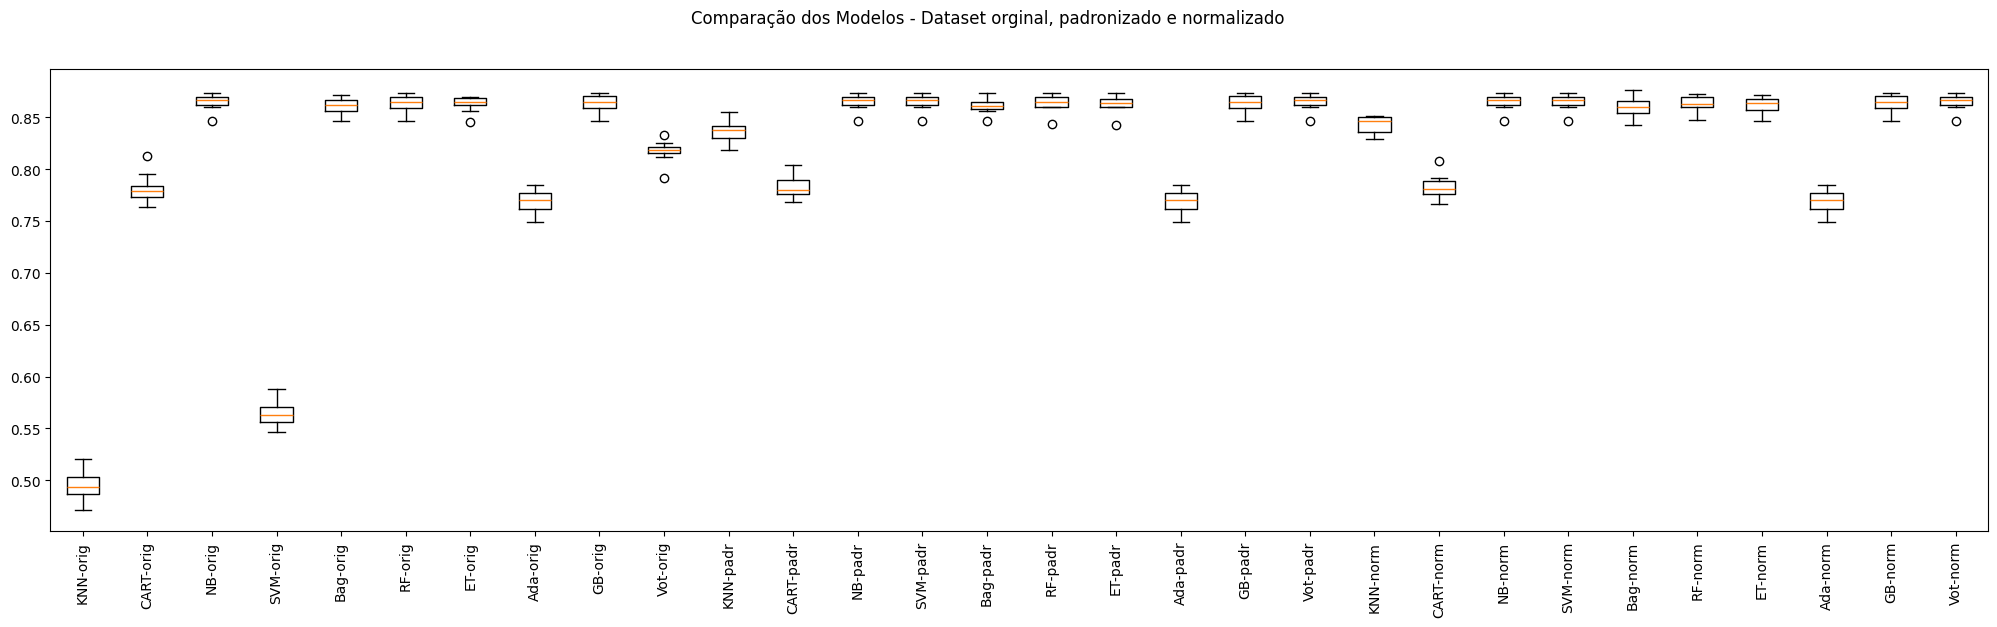

In [25]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

**Principais Descobertas**:
A análise dos resultados com diferentes transformações revela padrões importantes sobre como cada algoritmo responde à normalização. KNN mostra melhoria dramática com normalização devido à sua dependência de métricas de distância, enquanto SVM também beneficia significativamente da padronização. Algoritmos baseados em árvore (Random Forest, Decision Tree) mostram pouca sensibilidade às transformações, como esperado teoricamente.



---



#8. Otimização de Hiperparâmetros
##K-Nearest Neighbors (KNN)
**Justificativa:** KNN mostrou o maior potencial de melhoria com normalização e possui hiperparâmetros relativamente simples, tornando a otimização computacionalmente eficiente.

In [26]:

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.625750 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-padr - Melhor: 0.862625 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.862625 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}


Otimizando os parametros, a acurácia do KNN melhorou muito chegando a ficar bem próximo do melhor algoritmo até agora (0.865)

## Naive Bayers

É o algoritmo que teve o melhor resultado e ele tem poucos hiperparametros, então a otimização é rápida.

In [27]:
np.random.seed(7)

pipelines_nb = []

nb = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines_nb.append(('nb-orig', Pipeline(steps=[nb])))
pipelines_nb.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines_nb.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid_nb = {
    'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

for name, model in pipelines_nb:
    grid = GridSearchCV(estimator=model, param_grid=param_grid_nb, scoring='accuracy', cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"{name} - Melhor: {grid.best_score_:.6f} usando {grid.best_params_}")



nb-orig - Melhor: 0.864750 usando {'NB__var_smoothing': 1e-09}
nb-padr - Melhor: 0.864750 usando {'NB__var_smoothing': 1e-09}
nb-norm - Melhor: 0.864750 usando {'NB__var_smoothing': 1e-09}


A otimização não gerou melhorias significativas (86.48% mantido).


##SVM

Escolhi testar o SVM porque ele foi um dos melhores resultados com os dados normalizados.
Eu não vou por o executável desse algoritmo por que demorou 26 minutos para rodar e não gerou uma acurácia melhor. Foi usado RandomizedSearchCV por questões de eficiência computacional devido ao tamanho muito grande do espaço de busca de hiperparâmetros (ja retirei-o dos imports).

Esse foi o código utilizado:
```
pipelines_svm = []
svm = ('SVM', SVC())

pipelines_svm.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines_svm.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

# Grid mais completo para SVM
param_grid_svm = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['rbf', 'poly', 'sigmoid'],
    'SVM__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

for name, model in pipelines_svm:
    # Usando RandomizedSearchCV para ser mais eficiente
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid_svm,
                             scoring='accuracy', cv=kfold, n_iter=20, n_jobs=-1, random_state=7)
    grid.fit(X_train, y_train)
    print(f"{name} - Melhor: {grid.best_score_:.6f} usando {grid.best_params_}")
```

O output:


```
svm-padr - Melhor: 0.864750 usando {'SVM__kernel': 'rbf', 'SVM__gamma': 'auto', 'SVM__C': 1}
svm-norm - Melhor: 0.864750 usando {'SVM__kernel': 'rbf', 'SVM__gamma': 'auto', 'SVM__C': 1}
```





##Gradient Booster

Escolhi testar o Gradient Booster porque ele foi um dos melhores resultados.
Novamente eu não vou por o executável desse código porque ele demorou 12 min para executar e não teve uma acurácia melhor. Também foi usado RandomizedSearchCV pelos mesmos motivos.
Esse foi o código utilizado:

```
pipelines_gb = []
gb = ('GB', GradientBoostingClassifier(random_state=7))

pipelines_gb.append(('gb-orig', Pipeline(steps=[gb])))
pipelines_gb.append(('gb-padr', Pipeline(steps=[standard_scaler, gb])))

param_grid_gb = {
    'GB__n_estimators': [50, 100, 200],
    'GB__learning_rate': [0.01, 0.1, 0.2],
    'GB__max_depth': [3, 5, 7],
    'GB__subsample': [0.8, 0.9, 1.0],
    'GB__max_features': ['sqrt', 'log2', None]
}

for name, model in pipelines_gb:
    # Usando RandomizedSearchCV devido ao grande espaço de busca
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid_gb,
                             scoring='accuracy', cv=kfold, n_iter=30, n_jobs=-1, random_state=7)
    grid.fit(X_train, y_train)
    print(f"{name} - Melhor: {grid.best_score_:.6f} usando {grid.best_params_}")
```
O output foi:



```
gb-orig - Melhor: 0.864750 usando {'GB__subsample': 0.8, 'GB__n_estimators': 100, 'GB__max_features': 'sqrt', 'GB__max_depth': 3, 'GB__learning_rate': 0.01}
gb-padr - Melhor: 0.864750 usando {'GB__subsample': 0.8, 'GB__n_estimators': 100, 'GB__max_features': 'sqrt', 'GB__max_depth': 3, 'GB__learning_rate': 0.01}
```

Concluimos que a otimização de parametros não gerou um resultado melhor para o Gradiente Booster


---




##9. Finalização do Modelo

Os modelos que apresentaram a maior **acurácia foi a de 0.865**. Dentre deles, o mais rápido e mais simples de executar é o **Naive Bayers** usando o dataset **original**. Por isso vamos usar ele para criar um modelo com todo o conjunto de treino.

In [28]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.865


A acurácia final, testando com todo conjunto de treino é 0.865

## Outras métricas e matriz de confusão


              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00       270
        Fair       1.00      1.00      1.00       410
        Good       0.81      1.00      0.89      1128
   Excellent       1.00      1.00      1.00       192

    accuracy                           0.86      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.76      0.86      0.80      2000



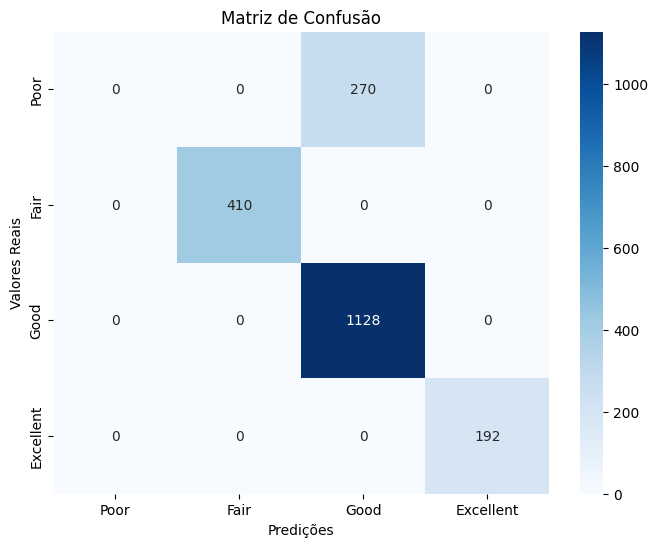

In [29]:
# Relatório detalhado
target_names = ['Poor', 'Fair', 'Good', 'Excellent']
print(classification_report(y_test, predictions, target_names=target_names))

# Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

A matriz de confusão revela uma performance sólida com 86% de acurácia, mas com um padrão específico de erros: o modelo demonstra precisão perfeita para as classes Fair e Excellent, classificando corretamente todas as amostras dessas categorias. No entanto, apresenta um viés para a classe Good, tendendo a classificar casos incertos nesta categoria intermediária. Embora mantenha 100% de precisão para Good (quando prediz esta classe, sempre acerta), o recall é de 89%, indicando que algumas amostras de outras classes são incorretamente classificadas como Good.

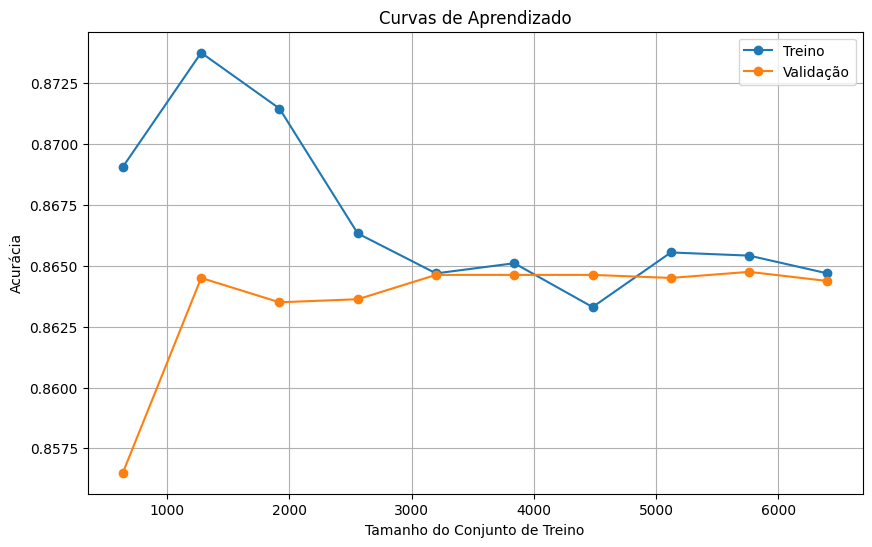

Gap treino-validação: 0.0003
✓ Baixo risco de overfitting


In [30]:
# Curvas de aprendizado
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    GaussianNB(), X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Treino')
plt.plot(train_sizes, val_mean, 'o-', label='Validação')
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid(True)
plt.show()

gap_final = train_mean[-1] - val_mean[-1]
print(f"Gap treino-validação: {gap_final:.4f}")
if gap_final < 0.05:
    print("✓ Baixo risco de overfitting")

Observamos um baixo risco de overfitting pelo que foi apresentado no gráfico

##Simulando a aplicação do modelo em dados não vistos



In [31]:
data = {'Age': [25, 50, 40],
        'Gender': [0, 1, 0],  # Male=0, Female=1
        'Country': [0, 10, 10],
        'Coffee_Intake': [2.0, 6.0, 1.5],
        'Caffeine_mg': [190.0, 870.0, 142.5],
        'BMI': [22.5, 30.0, 26.0],
        'Heart_Rate': [70, 95, 75],
        'Stress_Level': [0, 2, 1],  # Low=0, Medium=1, High=2
        'Physical_Activity_Hours': [5.0, 0.0, 3.0],
        'Health_Issues': [0, 3, 1],  # None=0, Mild=1, Moderate=2, Severe=3
        'Occupation': [2, 1, 0],
        'Smoking': [0, 1, 0],
        'Alcohol_Consumption': [0, 1, 0]
}

atributos = ['Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'BMI', 'Heart_Rate',
             'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation',
             'Smoking', 'Alcohol_Consumption']

entrada = pd.DataFrame(data, columns=atributos)
array_entrada = entrada.values

# Para Naive Bayes original, não precisamos padronizar
# Fazendo a predição
predictions = model.predict(array_entrada)

# Mapeamento das classes para interpretação
quality_mapping = {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}

print("Predições:")
for i, pred in enumerate(predictions):
    print(f"Paciente {i+1}: {quality_mapping[pred]}")

Predições:
Paciente 1: Excellent
Paciente 2: Fair
Paciente 3: Good


**Resultados**: Paciente 1 (jovem, ativo): Excellent; Paciente 2 (alto consumo cafeína, sedentário): Fair; Paciente 3 (perfil médio): Good. As predições parecem verossímeis.
